## Retrieve House Dataset


[house price dataset from Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

To retrieve the dataset lets use **wget** which is a It is a popular tool for downloading files and does not require any additional libraries to be loaded or installed. Recall we used this file in our data wrangling course so lets get the raw file from the github repository.

In [1]:
import pandas as pd

# Reanme the retrieved file using -O parameter
!wget -O house_price_dataset.csv  https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv

# Load the dataset
house_df = pd.read_csv('house_price_dataset.csv')

house_df.columns


--2025-04-29 18:54:10--  https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_price_dataset.csv’

house_price_dataset 100%[===================>] 449.88K  --.-KB/s    in 0.02s   

2025-04-29 18:54:10 (17.8 MB/s) - ‘house_price_dataset.csv’ saved [460676/460676]



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FstFlrSF', 'SndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Prompt

## Kaggle House Prices: Data Analysis and Model Building Workflow

As a data science agent create the following code. Write all the code and comment accordinlyl. Analyze the Kaggle House Prices dataset in the dataframe house_df. Please perform the following steps comprehensively, explaining the code with comment, and write the  Python code using libraries like Pandas, Scikit-learn, Matplotlib, Seaborn, XGBoost, or LightGBM:

1.  **Load Data:**

    * **Start with the existing `house_df` DataFrame.**
    * Split house_df into a training and test set.
    * Load `train.csv` and `test.csv` into pandas DataFrames.
    * Display the first few rows and basic info (`.info()`, `.describe()`) for both datasets.

2.  **Exploratory Data Analysis (EDA):**
    * Analyze the target variable `SalePrice`: Check its distribution, skewness, and apply a log transformation (`log1p`) to normalize it, as this aligns with the competition's evaluation metric (RMSLE). *Visualize the original and transformed distributions.*
    * Analyze Missing Values: Identify features with missing values in both training and test sets. Quantify the percentage missing for each. Visualize the missing data patterns if helpful (e.g., using `missingno` library).
    * Analyze Feature Types:  Explicitly separate features into numerical and categorical groups. For any correlation analysis or visualization that involves numerical calculations, ensure you are only using the numerical features.
    * Visualize Key Features: Create plots (scatter plots, box plots) to understand the relationship between top correlating numerical features (e.g., OverallQual, GrLivArea, GarageCars, TotalBsmtSF) and the log-transformed SalePrice.
    * Also, visualize relationships for key categorical features using appropriate visualization techniques for categorical data (e.g., bar plots, count plots).
    * Correlation Analysis: Examine correlations between numerical features and the (log-transformed) `SalePrice`. Visualize the highest correlations (e.g., heatmap).
    * Visualize Key Features: Create plots (scatter plots, box plots) to understand the relationship between top correlating features (e.g., `OverallQual`, `GrLivArea`, `GarageCars`, `TotalBsmtSF`) and the log-transformed `SalePrice`. Also, visualize relationships for key categorical features.
    * Outlier Detection: Briefly investigate potential outliers, especially in key features like `GrLivArea`, and discuss potential handling strategies (though be cautious about removing too much data).

3.  **Data Preprocessing & Feature Engineering:**
    * Combine Training and Test Data: Temporarily combine `train.csv` (without `SalePrice`) and `test.csv` for consistent preprocessing (remember the number of training rows to split them later). Keep the `Id` columns separate.
    * Handle Missing Values: Implement imputation strategies. Use appropriate methods based on feature type and meaning (e.g., 'None' for categorical representing absence, mode for other categoricals, median/mean or model-based imputation for numerical). *Explain your choices.*
    * Feature Transformation: Apply necessary transformations identified during EDA (like log transform for skewed numerical features if needed, beyond the target variable).
    * Categorical Encoding: Convert categorical features into numerical representations suitable for machine learning models (e.g., One-Hot Encoding for nominal features with low cardinality, potentially Label Encoding or Target Encoding for others, explaining the choice).
    * Feature Engineering (Optional but Recommended): Create new potentially useful features. Examples: `TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF`, `TotalBath = FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath`, `Age = YrSold - YearBuilt`.
    * Numerical Feature Scaling: Apply scaling (e.g., `StandardScaler` or `RobustScaler`) to numerical features ***after*** splitting the data back into training and testing sets to prevent data leakage from the test set.
    * Split Data: Separate the combined data back into processed training (`X`) and testing (`X_test`) sets. Assign the log-transformed `SalePrice` to the target variable (`y`).

4.  **Model Selection and Training:**
    * Choose Models: Select a few robust regression models suitable for this task (e.g., `Ridge`, `Lasso`, `ElasticNet`, `RandomForestRegressor`, `GradientBoostingRegressor`, `XGBoost`, `LightGBM`).
    * Cross-Validation Setup: Define a cross-validation strategy (e.g., `KFold` with shuffling). Use Root Mean Squared Log Error (RMSLE) as the scoring metric (this means models should predict the log-transformed price, and you'll take the RMSE of those predictions, or predict the original scale and calculate RMSLE directly). *Note: Since we log-transformed `y`, using standard RMSE on the transformed target during cross-validation is equivalent to RMSLE on the original scale.*
    * Baseline Model Training: Train the selected models using cross-validation on the processed training data (`X`, `y`) with default parameters. Report the average cross-validation RMSE scores for each.

5.  **Hyperparameter Tuning:**
    * Select Promising Models: Choose the top 2-3 models based on baseline cross-validation performance.
    * Tune Hyperparameters: Use techniques like `GridSearchCV` or `RandomizedSearchCV` to find optimal hyperparameters for the selected models, optimizing for the RMSE score (on the log-transformed target).

6.  **Model Evaluation and Final Selection:**
    * Evaluate Tuned Models: Report the best cross-validation RMSE scores for the tuned models.
    * Final Model Choice: Select the single best-performing model based on the tuned CV scores. Briefly justify the choice. Consider potentially blending/stacking models if aiming for top performance (though this adds complexity).

7.  **Prediction on Test Set:**
    * Train Final Model: Train the selected, tuned model on the *entire* processed training dataset (`X`, `y`).
    * Generate Predictions: Make predictions on the processed test dataset (`X_test`). Remember that the model predicts the ***log-transformed*** price, so apply the inverse transformation (`expm1`) to get the predictions back to the original scale.
    * Create Submission File: Generate a CSV file with two columns: `Id` (from the original test set) and `SalePrice` (the final, inverse-transformed predictions). Ensure it matches the format required by the Kaggle competition.

8.  **Conclusion:**
    * Summarize the final model, its expected performance (cross-validation score), and any key findings or challenges encountered.



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming house_df is already loaded

# 1. Split house_df into training and test sets
train_df, test_df = train_test_split(house_df, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# 2. Load train.csv and test.csv (if they exist separately)
# If you have separate train.csv and test.csv files, uncomment the following lines:
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

# 3. Display basic info for both datasets
print("Training Data:")
display(train_df.head())  # Display first few rows of training data
train_df.info()
train_df.describe()

print("\nTest Data:")
display(test_df.head())  # Display first few rows of test data
test_df.info()
test_df.describe()

Training Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallCond

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    250 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          17 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCond  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,TSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,292.000000,292.000000,250.000000,292.000000,292.000000,292.000000,292.000000,292.000000,290.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,728.880137,57.089041,68.932000,9825.571918,6.010274,5.537671,1972.476027,1984.739726,103.337931,434.102740,...,87.434932,34.986301,22.414384,1.797945,13.674658,1.972603,12.376712,6.184932,2007.804795,178839.811644
std,406.932776,41.433741,21.809309,5886.343498,1.441850,1.100743,28.251377,20.321997,210.539173,444.652028,...,106.111686,50.049184,57.199562,17.941206,55.333233,33.707850,79.339770,2.832078,1.351941,87730.751259
min,16.000000,20.000000,21.000000,1491.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,374.250000,20.000000,59.000000,7315.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,127000.000000
50%,720.000000,50.000000,66.500000,9008.500000,6.000000,5.000000,1975.000000,1992.000000,0.000000,374.000000,...,26.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,154150.000000
75%,1066.250000,70.000000,80.000000,11256.250000,7.000000,6.000000,1999.000000,2003.250000,147.250000,685.250000,...,168.000000,53.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,209175.000000
max,1451.000000,190.000000,174.000000,70761.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,2188.000000,...,466.000000,274.000000,318.000000,238.000000,396.000000,576.000000,600.000000,12.000000,2010.000000,755000.000000


Skewness of SalePrice: 1.743128561420854


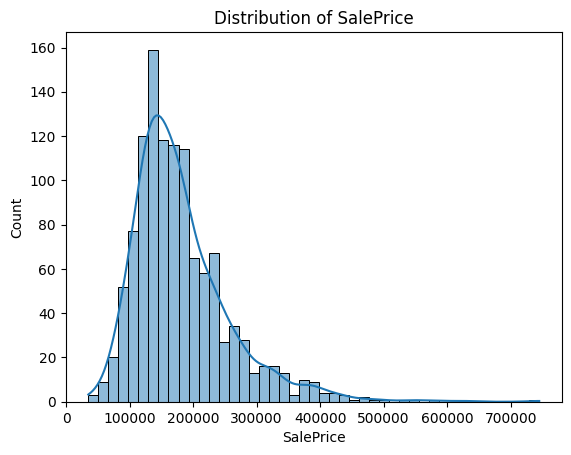

Skewness of log-transformed SalePrice: 0.12489024367919238


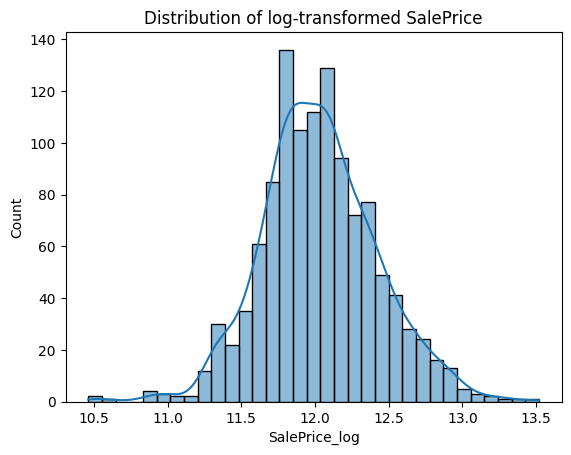

              Total   Percent
PoolQC         1162  0.994863
MiscFeature    1122  0.960616
Alley          1094  0.936644
Fence           935  0.800514
MasVnrType      683  0.584760
FireplaceQu     547  0.468322
LotFrontage     217  0.185788
GarageQual       64  0.054795
GarageYrBlt      64  0.054795
GarageFinish     64  0.054795
GarageType       64  0.054795
GarageCond       64  0.054795
BsmtCond         28  0.023973
BsmtFinType1     28  0.023973
BsmtFinType2     28  0.023973
BsmtExposure     28  0.023973
BsmtQual         28  0.023973
MasVnrArea        6  0.005137
Electrical        1  0.000856


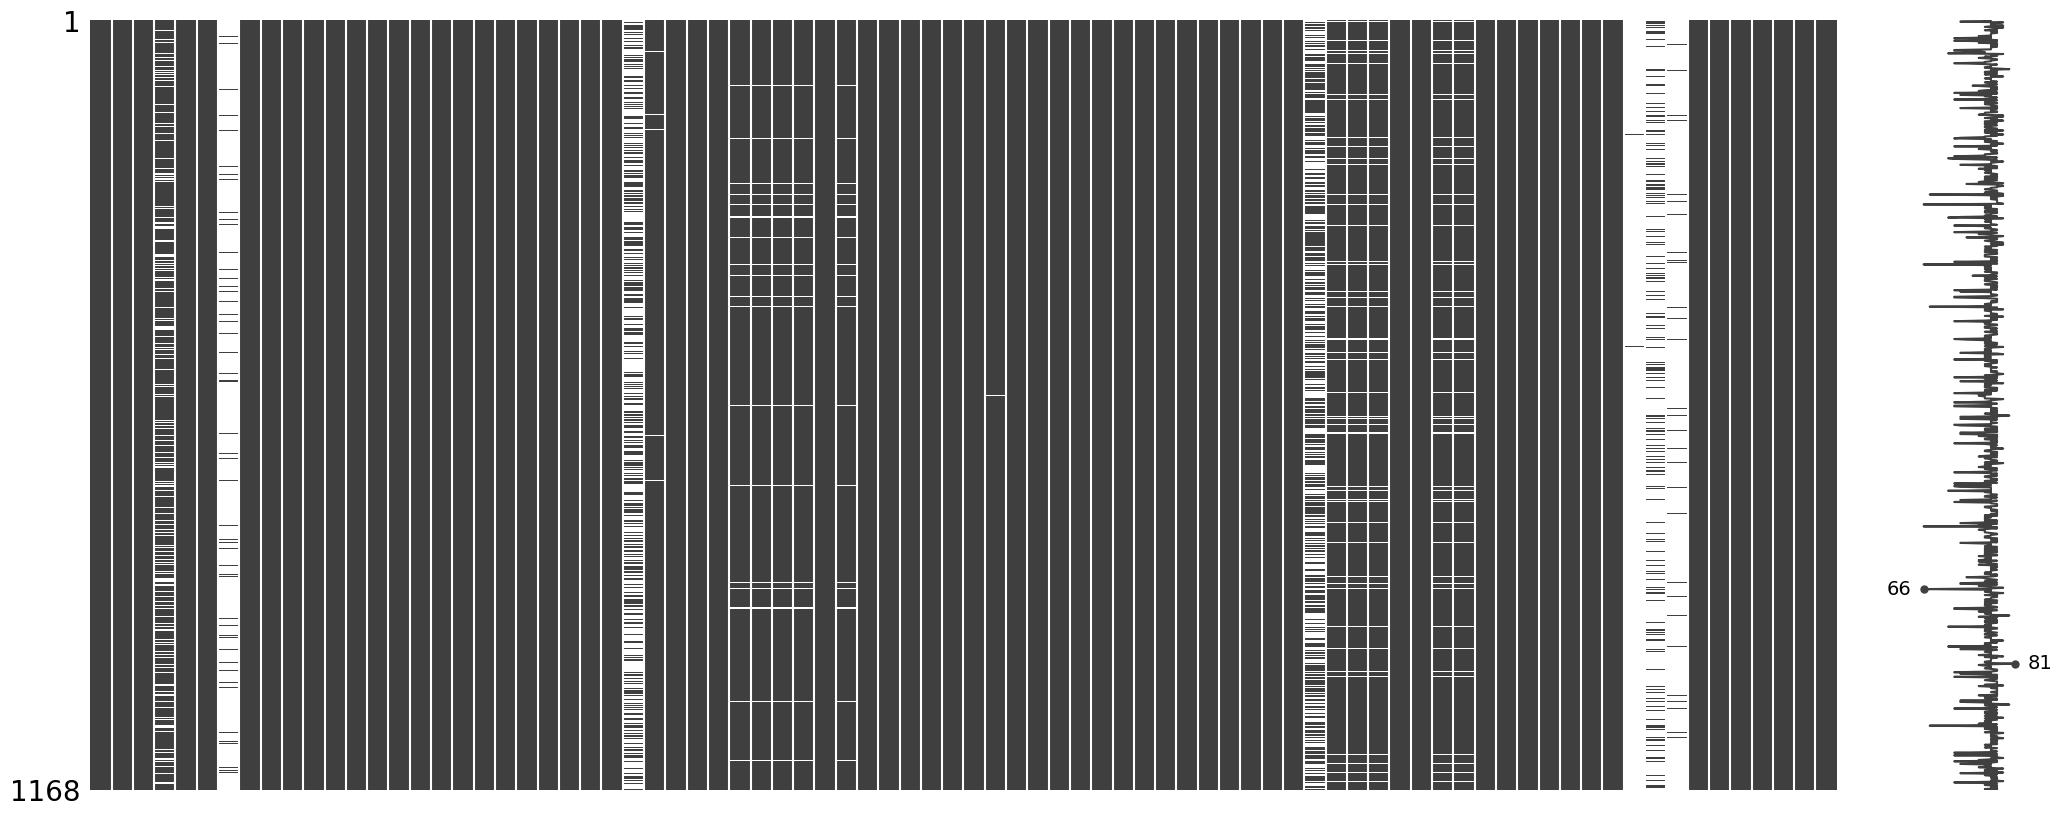

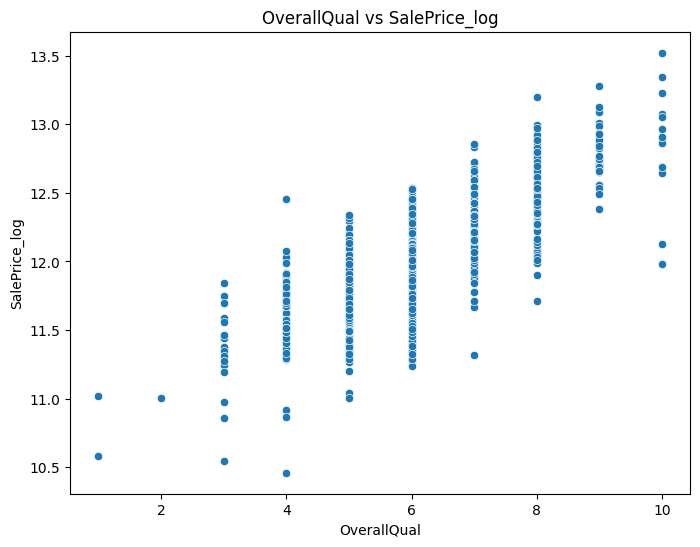

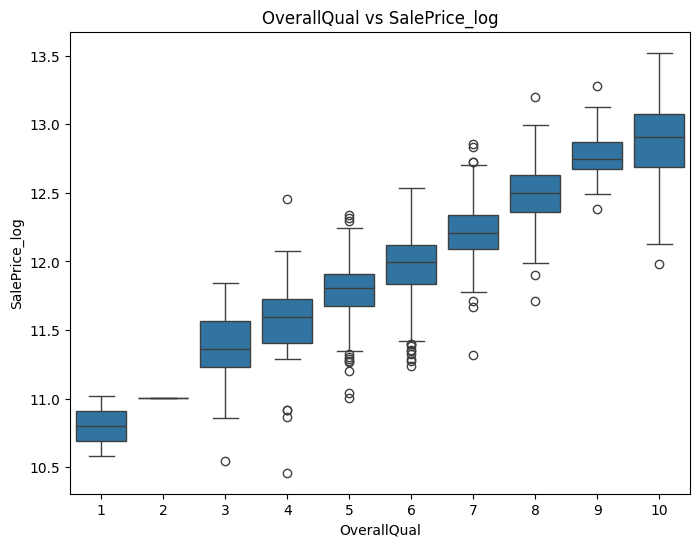

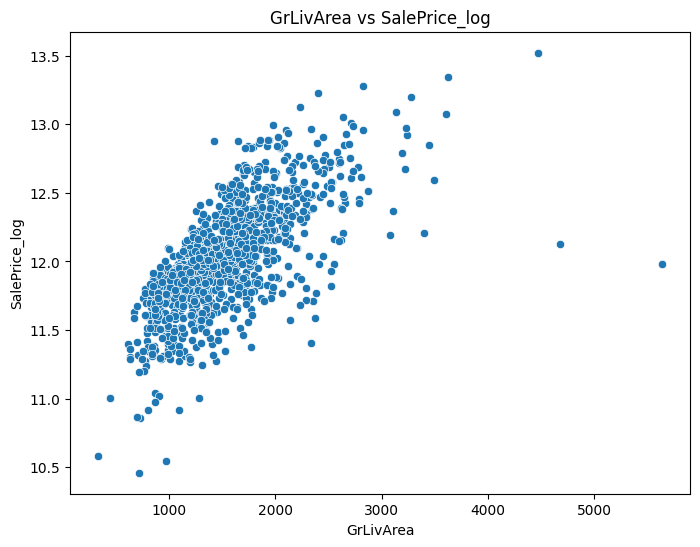

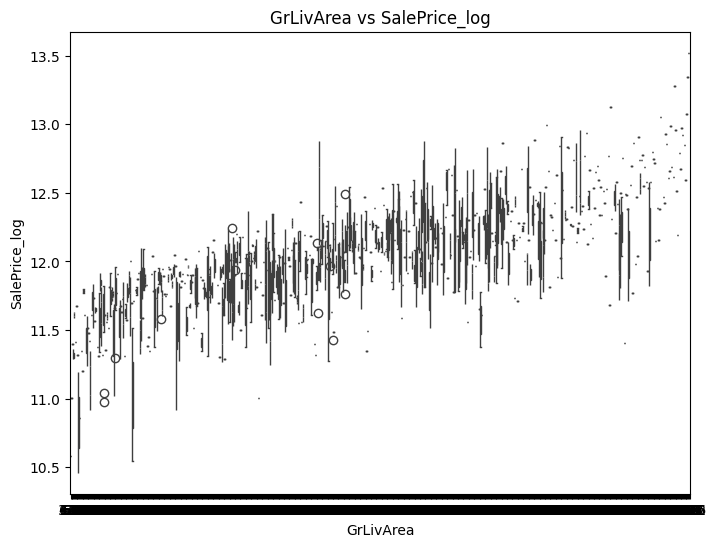

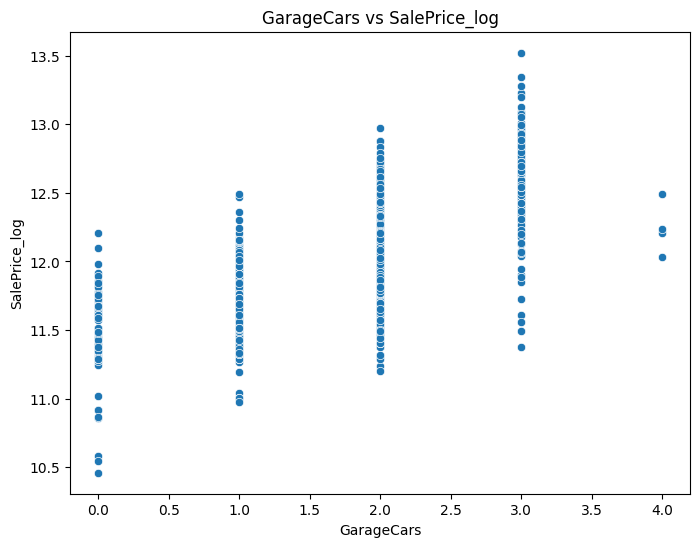

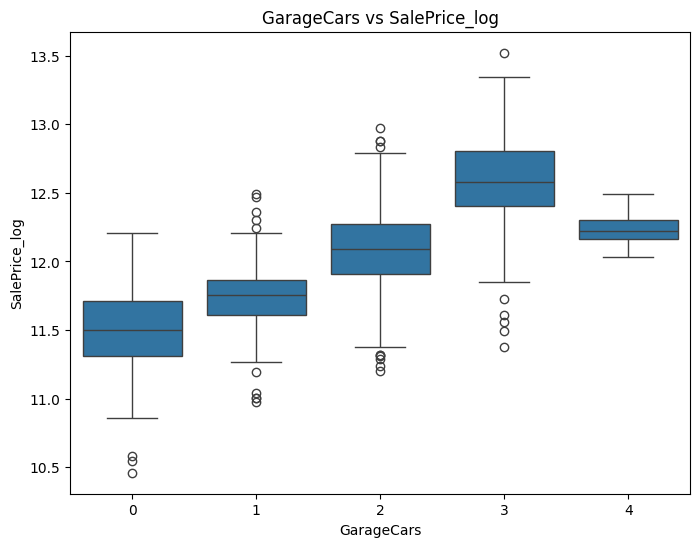

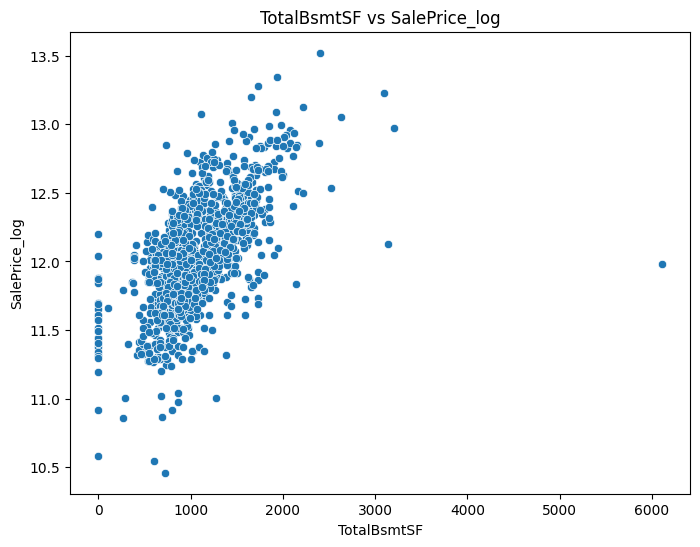

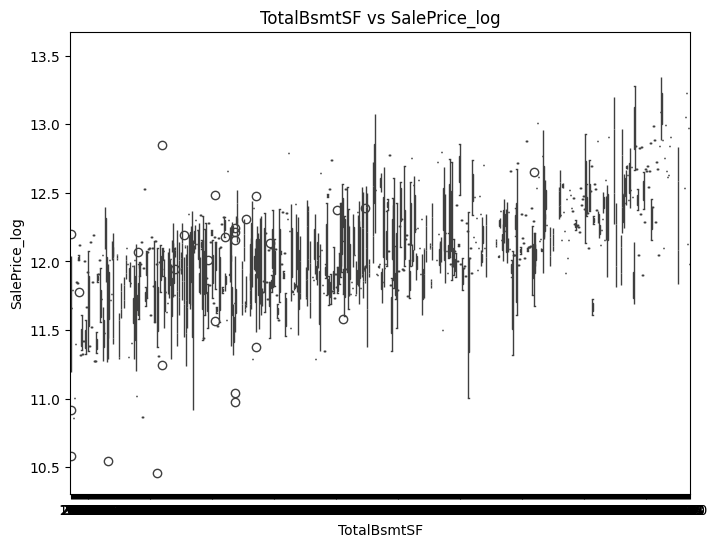

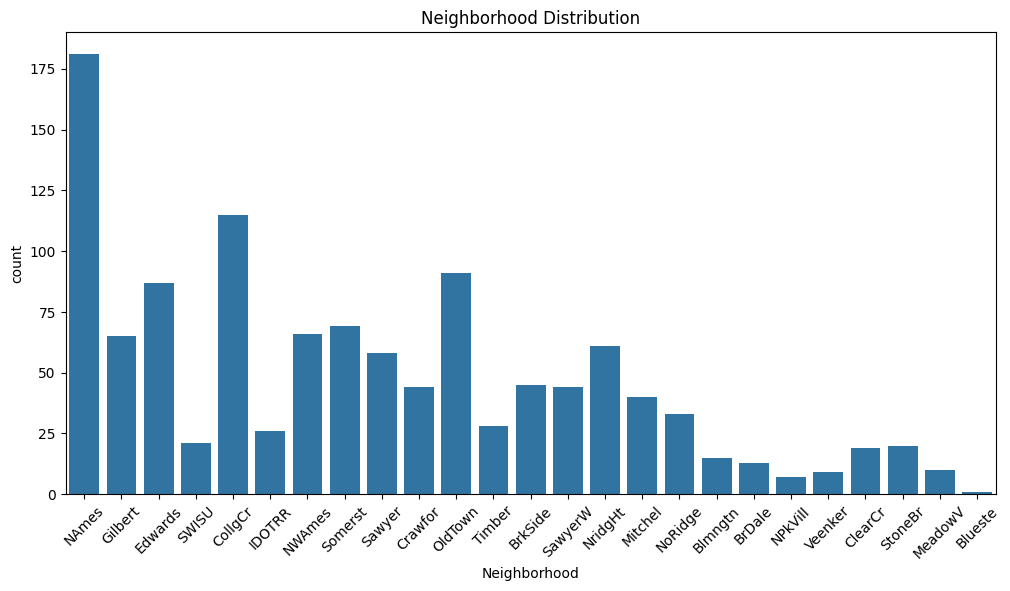

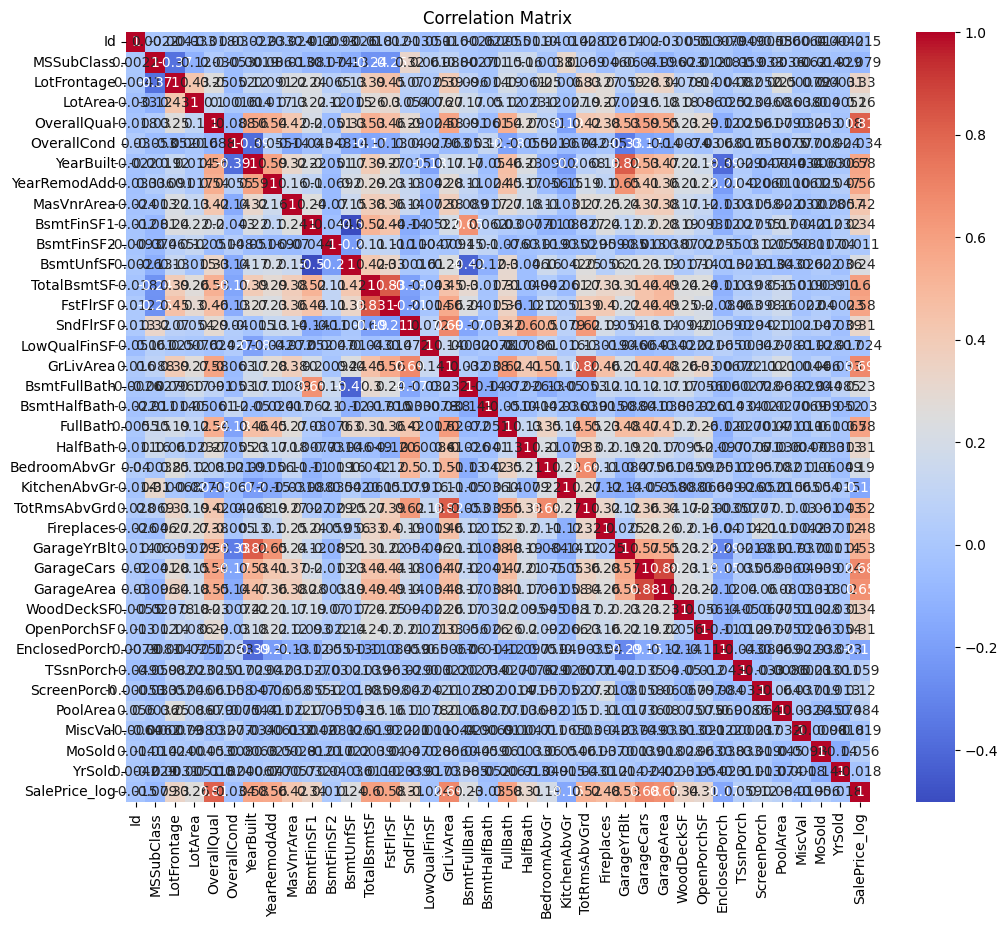

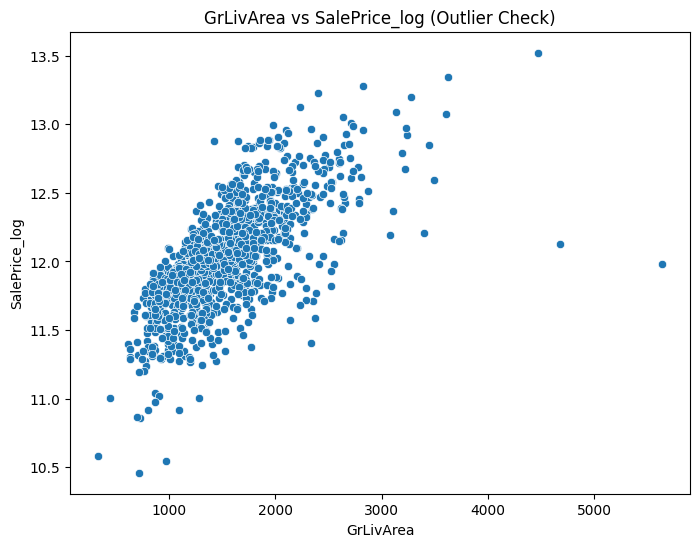

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# missingno is useful for visualizing missing data patterns, install it if not already present
!pip install missingno==0.5.2

import missingno as msno

# 1. Analyze target variable 'SalePrice'
# Distribution and skewness
print("Skewness of SalePrice:", train_df['SalePrice'].skew())
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Log transformation
train_df['SalePrice_log'] = np.log1p(train_df['SalePrice'])
print("Skewness of log-transformed SalePrice:", train_df['SalePrice_log'].skew())
sns.histplot(train_df['SalePrice_log'], kde=True)
plt.title('Distribution of log-transformed SalePrice')
plt.show()

# 2. Analyze missing values
total_missing = train_df.isnull().sum().sort_values(ascending=False)
percent_missing = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

# Visualize missing data patterns (optional)
msno.matrix(train_df)
plt.show()

# 3. Analyze feature types
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

# Remove 'SalePrice' and 'SalePrice_log' from numerical features
numerical_features.remove('SalePrice')
numerical_features.remove('SalePrice_log') if 'SalePrice_log' in numerical_features else None

# 4. Visualize key features
# Numerical features
for feature in ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='SalePrice_log', data=train_df)
    plt.title(f'{feature} vs SalePrice_log')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='SalePrice_log', data=train_df)
    plt.title(f'{feature} vs SalePrice_log')
    plt.show()

# Categorical features (example)
plt.figure(figsize=(12, 6))
sns.countplot(x='Neighborhood', data=train_df)
plt.title('Neighborhood Distribution')
plt.xticks(rotation=45)
plt.show()

# 5. Correlation analysis
corr_matrix = train_df[numerical_features + ['SalePrice_log']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Outlier detection (example for GrLivArea)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice_log', data=train_df)
plt.title('GrLivArea vs SalePrice_log (Outlier Check)')
plt.show()

# Potential outlier handling: Consider removing extreme outliers or using robust regression models.